In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start='2013-01-01'
end='2023-11-15'

stock='GOOG'

data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2013-01-02,17.879629,17.972335,17.713997,17.784949,102033017
1,2013-01-03,17.890015,18.094212,17.817087,17.921163,93075567
2,2013-01-04,18.243528,18.330053,17.989148,18.030186,110954331
3,2013-01-07,18.163925,18.278383,18.060837,18.181229,66476239
4,2013-01-08,18.128080,18.202245,17.908802,18.183457,67295297
...,...,...,...,...,...,...
2732,2023-11-08,132.267960,132.545874,131.176157,131.374666,15093600
2733,2023-11-09,130.709671,132.962777,130.531003,132.367237,17976500
2734,2023-11-10,133.062042,133.270486,129.895786,130.550877,20872900


In [6]:
ma_100_days=data.Close.rolling(100).mean()

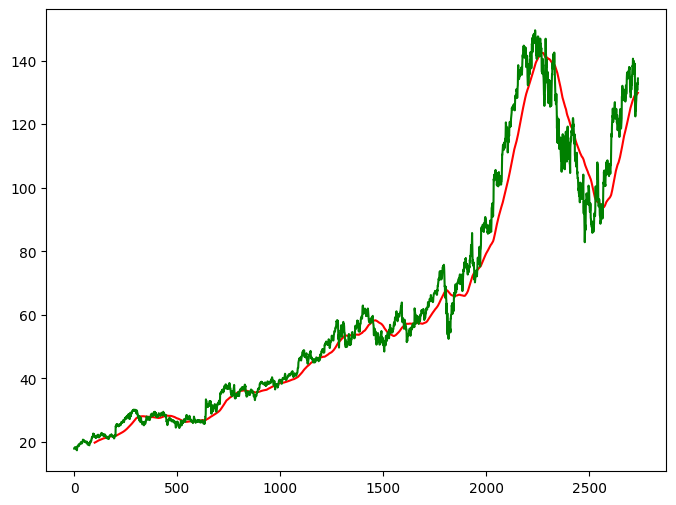

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [9]:
ma_200_days=data.Close.rolling(200).mean()

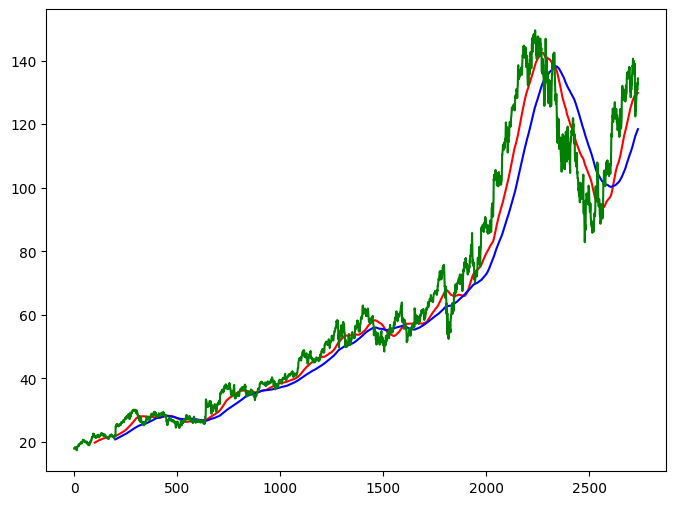

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [13]:
data_train.shape[0]

2189

In [14]:
data_test.shape[0]

548

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale=scaler.fit_transform(data_train)

In [17]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [18]:
x,y=np.array(x),np.array(y)

In [19]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


In [20]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

d:\PROJECT\Stock Price Prediction\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.0180
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0037
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0039
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0031
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0030
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0031
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0029
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0027
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0023
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0023
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0025
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0021
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0024
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0023
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [24]:
pas_100_days=data_train.tail(100)

In [25]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [26]:
data_test_scale=scaler.fit_transform(data_test)

In [27]:
x=[]
y=[]

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [28]:
y_predict=model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step


In [29]:
scale=1/scaler.scale_

In [30]:
y_predict=y_predict*scale

In [31]:
y=y*scale

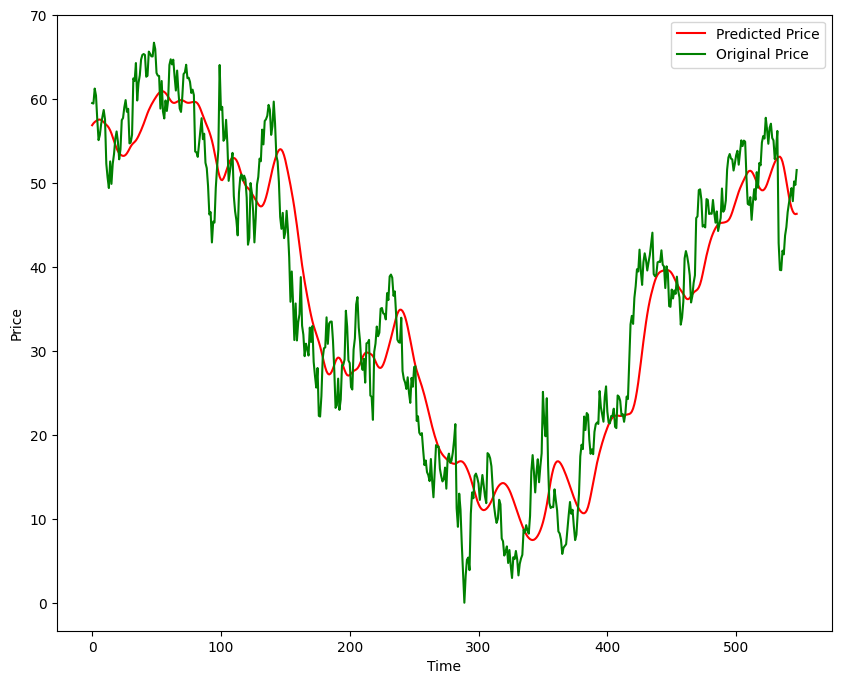

In [32]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
model.save('STOCK.keras')